In [161]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

In [162]:
data = pd.read_csv(r'covid19train.csv')

In [163]:
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,1.0,20.0,3822.0
2,2.0,21.0,4206.0
3,3.0,22.0,4108.0
4,4.0,23.0,4830.0


In [164]:
data = np.array(data)

In [165]:
my_df = pd.DataFrame(data,columns=['Radif','Day','Number_of_patients'])

In [166]:
my_df.head()

,Radif,Day,Number_of_patients
0,NaN,NaN,NaN
1,1.0,20.0,3822.0
2,2.0,21.0,4206.0
3,3.0,22.0,4108.0
4,4.0,23.0,4830.0


In [167]:
dataset=my_df.dropna(axis=0)

In [168]:
dataset.head()

,Radif,Day,Number_of_patients
1,1.0,20.0,3822.0
2,2.0,21.0,4206.0
3,3.0,22.0,4108.0
4,4.0,23.0,4830.0
5,5.0,24.0,4616.0


In [169]:
dataset = pd.get_dummies(dataset)

In [170]:
X = dataset.iloc[:,1].values
y = dataset.iloc[:,-1].values

In [171]:
print(X)

[20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.  1.  2.  3.  4.  5.  6.  7.
  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]


Text(0.5, 1.0, 'covid19')

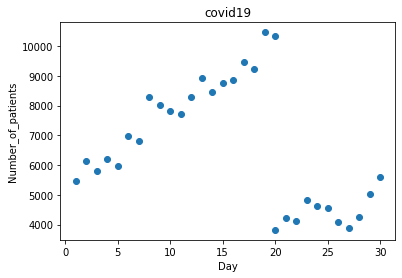

In [172]:
plt.scatter(X, y)
plt.xlabel('Day')
plt.ylabel('Number_of_patients')
plt.title('covid19')

In [173]:
dataset.describe()

,Radif,Day,Number_of_patients
count,31.000000,31.000000,31.000000
mean,16.000000,15.645161,6678.548387
std,9.092121,8.693095,2075.576110
min,1.000000,1.000000,3822.000000
25%,8.500000,8.500000,4723.000000
50%,16.000000,16.000000,6191.000000
75%,23.500000,22.500000,8372.500000
max,31.000000,30.000000,10463.000000


In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)

In [175]:
X_train = X_train.reshape(-1,1)

In [176]:
y_train = y_train.reshape(-1,1)

In [177]:
X_test = X_test.reshape(-1,1)

In [178]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [179]:
y_pred = regressor.predict(X_test)

Text(0, 0.5, 'Number_of_patients')

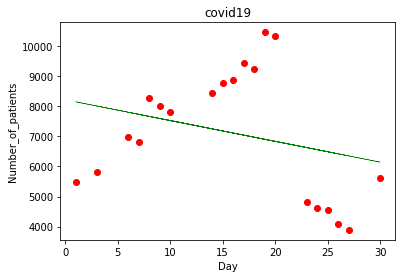

In [182]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'green', lw=0.5)
plt.title('covid19')
plt.xlabel('Day')
plt.ylabel('Number_of_patients')

In [25]:
#  Y_train,Y_test = train_test_split(X,Y, test_size = 0.3,random_state = 42)
class Regresion:
    def __init__(self,learning_rate, n_iters):
        self.lr=learning_rate
        self.n_iters=n_iters
        self.w = np.random.rand(1,1)
        self.b = np.random.rand(1,1)
        self.Error = []
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
        
        for j in range(self.n_iters):
            
            for i in range(self.X_train.shape[0]):
                y_pred = np.matmul(self.X_train[i], self.w) + self.b
                e = np.mean(self.Y_train[i] - y_pred)
                
                self.w += self.lr * self.X_train[i]* e
                self.b += self.lr*e

                self.Error.append(np.abs(e))
                
        np.save('weight', self.w)
        np.save('baias', self.b)
                
        return self.Error, self.w
            
    def predict(self,X_test):
        w = np.load('weight.npy')
        b = np.load('baias.npy')
        y_predict = np.matmul(X_test, w)+b
                    
        return y_predict
    

    
    def evaluate(self,X_test,Y_test):
        w = np.load('weight.npy')
        b = np.load('baias.npy')
        Y_pred = np.matmul(X_test, w) + b
        absolute_error = np.abs(Y_pred - Y_test)
        evaluation = np.mean(absolute_error)
        return evaluation
    

In [26]:
model = Regresion(learning_rate=0.001, n_iters=100)
w,Error= model.fit(X, t)

In [27]:
print(w)

[3809.4298376751703, 2589.0626318138193, 1215.5407923304128, 1190.105454397196, 160.07908446257898, 185.39892440353287, 702.816601748038, 606.2139347402845, 47.4858414824439, 647.0434562195378, 509.3026061531318, 5276.4917633194655, 5738.452949915359, 5187.797949388483, 5295.393840269135, 4735.664439998019, 5358.151137371539, 4721.3646112780325, 5626.711894424425, 4606.377439841735, 3623.5989113710366, 2706.3238538051737, 2466.091213731698, 2241.8537632665784, 841.9403001147693, 445.49257339406176, 120.4566243920035, 58.839842131994374, 810.1165808062069, 140.4131135178286, 576.8424771704431, 6862.528643825097, 4120.293278826142, 2704.2361119045463, 918.3008654885007, 872.099754731019, 638.4661500891007, 877.3926402189763, 663.1919142306879, 33.05027340198467, 645.292491370441, 510.42941397580125, 5236.883292303671, 5700.332960346757, 5151.354064252024, 5260.909230123749, 4703.498842805394, 5328.715448272176, 4695.088259376195, 5604.003511281842, 4587.580919832722, 3608.9486929121467, 

In [191]:
data_test=pd.read_csv('covid19test.csv')

In [192]:
data_test.head()

,32,21,11780
0,33,22,11517
1,34,23,11737
2,35,24,11203
3,36,25,12543
4,37,26,13053


In [193]:
my_df = pd.DataFrame(data,columns=['radif','Day','Number_of_patients'])

In [281]:
my_df.head(20)

,radif,Day,Number_of_patients
0,NaN,NaN,NaN
1,1.0,20.0,3822.0
2,2.0,21.0,4206.0
3,3.0,22.0,4108.0
4,4.0,23.0,4830.0
5,5.0,24.0,4616.0
6,6.0,25.0,4552.0
7,7.0,26.0,4103.0
8,8.0,27.0,3890.0
9,9.0,28.0,4251.0


In [225]:
test_dataset=my_df.dropna(axis=0)

In [226]:
test_dataset = dataset.astype('int')

In [227]:
test_dataset.head()

,Radif,Day,Number_of_patients
1,1,20,3822
2,2,21,4206
3,3,22,4108
4,4,23,4830
5,5,24,4616


In [228]:
X = dataset.iloc[:,1].values
T = dataset.iloc[:,-1].values

In [229]:
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size = 1/3)

In [230]:
X_train.shape

(20,)

In [231]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
T_test = T_test.reshape(-1,1)

In [232]:
X_train.shape

(20, 1)

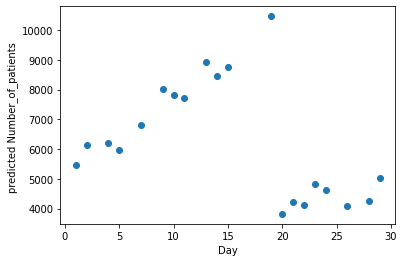

In [233]:
plt.scatter(X_train,T_train)
plt.xlabel('Day')
plt.ylabel('predicted Number_of_patients ')
plt.show()

In [234]:
reg_test = LinearRegression()

In [235]:
my_model =reg_test.fit(X_test,T_test)

In [236]:
yhat_test=reg_test.predict(T_test)

Text(0, 0.5, 'Number_of_patients')

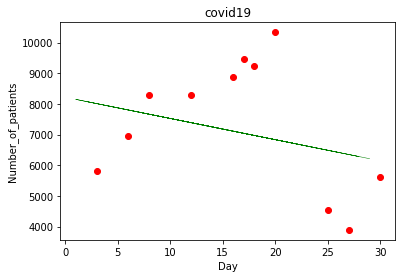

In [237]:
plt.scatter(X_test, T_test, color = 'red')
plt.plot(X_train , regressor.predict(X_train), color = 'green', lw=0.5)
plt.title('covid19')
plt.xlabel('Day')
plt.ylabel('Number_of_patients')

In [238]:
from sklearn.metrics import mean_squared_error

In [239]:
y_pred = reg_test.predict(X_test)

In [272]:
mean_squared_error(T_test,y_pred)

3812809.349414256